In [32]:
import numpy as np
import numpy
from numpy.linalg import inv

In [33]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0+ self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0+ self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0 
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0 
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0           
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        reward = [0]*100
        reward[99] = 1.0
        self.reward = reward
        



In [44]:
from cvxopt import matrix, solvers

In [61]:
def irl(state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy):
    """
    - state_num: number of state = 100;
    - PU, PD, PL, PR: four transition probability matrix 100*100;
    - lambda_num: adjustable pernalty coefficient;
    - discount: disc;
    - Rmax: max value in T_rewardf;
    - policy: policy function 10*10, values should be in [0, 1, 2, 3];
    
     should return the estimated reward function of ground truth reward function 1 or 2.
    
    """
    # change reward function dimension to 100*1
    policy = np.reshape(policy,(100,1))
    #print(policy[1])
    
    #action set
    A = [0, 1, 2, 3]
    
    # transfer four transition probability matrix to a three dimension probability tensor 
    P = [[[0]*100]*100]*4
    P[0] = PU
    P[1] = PD
    P[2] = PL
    P[3] = PR
    #P = np.asarray(P)
    #print(P[3][5])
    
    # a handle for numtiplication in P.
    def multiply(state, other_action):
        #print(state)
        #policy_action = policy[state][0]
        policy_action = int(policy[state])
        mul = - np.dot(P[policy_action][state] - P[other_action][state]
        ,inv(np.eye(state_num) - discount * P[policy_action]))
        #print(mul)
        return mul
    
    # D inclusing following parts: [D00 D01 D02]
    #                              [D10 D11 D12]
    #                              [D20 D21 D22]
    #                              [D30 D31 D32]
    #                              [D40 D41 D42]
    #                              [D50 D51 D52]
    
    #D00 (300*100)
    D00 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])
    D01 = np.eye(300, 100)
    D02 = np.zeros((300, 100))
    #D03 = np.zeros((300, 100))
    
    D0 = np.hstack((D00, D01, D02))
    
    
    D10 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])    
    D11 = np.zeros((300, 100))
    D12 = np.zeros((300, 100))
    #D13 = np.zeros((300, 100))
    
    D1 = np.hstack((D10, D11, D12))
    
    D20 = np.eye(100 , 100)
    D21 = np.zeros((100, 100))
    D22 = - np.eye(100 , 100)
    #D23 = np.zeros((100, 100))
      
    D2 = np.hstack((D20, D21, D22))
    
    D30 = - np.eye(100 , 100)
    D31 = np.zeros((100, 100))
    D32 = - np.eye(100 , 100)
    #D33 = np.zeros((100, 100))
      
    D3 = np.hstack((D30, D31, D32))
    
    D40 = np.eye(100 , 100)
    D41 = np.zeros((100, 100))
    D42 = np.zeros((100, 100))
    #D43 = - Rmax * np.eye(100 , 100)
      
    D4 = np.hstack((D40, D41, D42))
        
    D50 = - np.eye(100 , 100)
    D51 = np.zeros((100, 100))
    D52 = np.zeros((100, 100))
    #D53 = - Rmax * np.eye(100 , 100)
      
    D5 = np.hstack((D50, D51, D52))  
        
    D = np.vstack((D0, D1, D2, D3, D4, D5))
    #print(D.shape)
    CT = np.hstack((np.zeros(100), np.ones(100), -lambda_num * np.ones(100)))
    
    b = np.zeros((800, 1))
    bmax = Rmax * np.ones(200)
    b = np.append(b, bmax)
    print(b.shape)
    
    D = matrix(D)
    CT = matrix(CT)
    b = matrix(b)
    sol=solvers.lp(CT,D,b)
    
    #print(len(sol['x']))
    
    return sol['x'][:100]
    
    

In [62]:
env = Environment(w =0.1,disc = 0.8) 

# action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'.
P1 = [[1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

P2 = [[1, 1, 1, 2, 2, 3, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 0, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 0, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 1, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
      [3, 3, 3, 1, 1, 1, 1, 1, 1, 1],
      [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

#state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy
#R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.0, 0.8, 1, P1) 
#print(R)


In [65]:
import matplotlib.pyplot as plt
import math
 # optimal function# optima 
def value_iteration(env):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     


def optimal_policy(env):
    V=value_iteration(env)
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumd>maxnum):
                arrow[i][j]=1
                maxnum=sumd
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            if(suml>maxnum):
                arrow[i][j]=2
                maxnum=suml
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumr>maxnum):
                arrow[i][j]=3
                maxnum=sumr 
    #print(arrow)
    
    
    return arrow
    

In [66]:
def s_range(start, end, step):
    while start <= end:
        yield start
        start += step

accuracy = []
for i in s_range(0, 5, 0.01):
    print(i)
    R = irl(100, env.PU, env.PD, env.PL, env.PR , i, 0.8, 10, P2) 
    arrow = optimal_policy(Environment(w=0.1,disc=0.8))
    P = np.asarray(P2)
    acc = np.sum(arrow == P)
    accuracy = np.append(accuracy, acc/100)

print(accuracy)

0
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -2.8511e+02 -2.3070e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9701e+03 -1.1059e+04  4e+04  3e-01  4e+01  1e+01
 3: -5.9578e+03 -1.1969e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5581e+04 -1.9615e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.5531e+04 -3.8883e+04  1e+05  2e-01  2e+01  7e+01
 6: -5.8628e+05 -5.8854e+05  1e+06  2e-01  2e+01  9e+02
 7: -5.8257e+07 -5.8175e+07  1e+08  2e-01  2e+01  9e+04
Certificate of dual infeasibility found.
0.01
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -2.8605e+02 -2.3079e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9685e+03 -1.1051e+04  4e+04  3e-01  4e+01  1e+01
 3: -5.9626e+03 -1.1970e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5596e+04 -1.9629e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.5608e+04 -3.8962e+04  1e+05  2e-01  2e+01  7e+01
 6: -5.8840e+05 -5.9066e+05  1e+06  2e-01  2

Certificate of dual infeasibility found.
0.15
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.0027e+02 -2.3223e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9491e+03 -1.0939e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.0350e+03 -1.1997e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5824e+04 -1.9849e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.6778e+04 -4.0151e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.2102e+05 -6.2325e+05  1e+06  2e-01  2e+01  9e+02
 7: -6.1777e+07 -6.1691e+07  1e+08  2e-01  2e+01  9e+04
Certificate of dual infeasibility found.
0.16
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.0137e+02 -2.3234e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9479e+03 -1.0931e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.0407e+03 -1.2000e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.5842e+04 -1.9867e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.6869e+04 -4.0243e+04  1e+05  2e-01  2e+01  7e+01


(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.1802e+02 -2.3402e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9345e+03 -1.0822e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.1268e+03 -1.2038e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6122e+04 -2.0142e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.8263e+04 -4.1658e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.6346e+05 -6.6565e+05  1e+06  2e-01  2e+01  1e+03
 7: -6.6072e+07 -6.5980e+07  1e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.3100000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.1930e+02 -2.3415e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9338e+03 -1.0814e+04  4e+04  3e-01  4e+01  1e+01
 3: -6.1335e+03 -1.2041e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6144e+04 -2.0163e+04  6e+04  2e-01  3e+01  3e+01
 5: -3.8372e+04 -4.1768e+04  1e+05  2e-01  2e+01  7e+01
 6: -6.6663e+05 -6.6882e+05  1e+

 2: -4.9274e+03 -1.0707e+04  4e+04  3e-01  4e+01  9e+00
 3: -6.2363e+03 -1.2094e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6491e+04 -2.0507e+04  6e+04  2e-01  3e+01  3e+01
 5: -4.0060e+04 -4.3478e+04  1e+05  2e-01  2e+01  7e+01
 6: -7.1660e+05 -7.1874e+05  2e+06  2e-01  2e+01  1e+03
 7: -7.1440e+07 -7.1341e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.46000000000000024
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  3e+01  1e+00
 1: -3.4042e+02 -2.3628e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9272e+03 -1.0700e+04  4e+04  3e-01  4e+01  9e+00
 3: -6.2443e+03 -1.2098e+04  5e+04  3e-01  4e+01  2e+01
 4: -1.6519e+04 -2.0535e+04  6e+04  2e-01  3e+01  3e+01
 5: -4.0193e+04 -4.3613e+04  1e+05  2e-01  2e+01  7e+01
 6: -7.2062e+05 -7.2276e+05  2e+06  2e-01  2e+01  1e+03
 7: -7.1847e+07 -7.1747e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.47000000000000025
(1000,)
     pcost       dcost  

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -3.6363e+02 -2.3862e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9292e+03 -1.0597e+04  4e+04  3e-01  3e+01  9e+00
 3: -6.3676e+03 -1.2168e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.6953e+04 -2.0969e+04  6e+04  2e-01  2e+01  3e+01
 5: -4.2276e+04 -4.5718e+04  1e+05  2e-01  2e+01  8e+01
 6: -7.8511e+05 -7.8718e+05  2e+06  2e-01  2e+01  1e+03
 7: -7.8353e+07 -7.8244e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.6100000000000003
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -3.6544e+02 -2.3880e+03  3e+03  1e-01  1e+01  1e+00
 2: -4.9297e+03 -1.0589e+04  4e+04  3e-01  3e+01  9e+00
 3: -6.3772e+03 -1.2174e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.6988e+04 -2.1003e+04  6e+04  2e-01  2e+01  3e+01
 5: -4.2442e+04 -4.5886e+04  1e+05  2e-01  2e+01  8e+01
 6: -7.9039e+05 -7.9246e+05  2e+

 5: -4.5672e+04 -4.9121e+04  1e+05  2e-01  2e+01  8e+01
 6: -9.0177e+05 -9.0372e+05  2e+06  2e-01  2e+01  1e+03
 7: -9.0106e+07 -8.9982e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.7500000000000004
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.0766e+02 -2.4306e+03  4e+03  1e-01  1e+01  1e+00
 2: -4.8205e+03 -1.0162e+04  3e+04  3e-01  3e+01  9e+00
 3: -6.4760e+03 -1.2052e+04  4e+04  3e-01  3e+01  2e+01
 4: -1.7745e+04 -2.1732e+04  7e+04  2e-01  2e+01  3e+01
 5: -4.5975e+04 -4.9424e+04  1e+05  2e-01  2e+01  8e+01
 6: -9.1279e+05 -9.1473e+05  2e+06  2e-01  2e+01  1e+03
 7: -9.1216e+07 -9.1091e+07  2e+08  2e-01  2e+01  1e+05
Certificate of dual infeasibility found.
0.7600000000000005
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.1111e+02 -2.4341e+03  4e+03  1e-01  1e+01  1e+00
 2: -4.8129e+03 -1.0130e+04 

 7: -1.1877e+08 -1.1861e+08  3e+08  2e-01  2e+01  2e+05
Certificate of dual infeasibility found.
0.9000000000000006
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.6101e+02 -2.5057e+03  4e+03  1e-01  1e+01  1e+00
 2: -5.4779e+03 -1.1097e+04  4e+04  3e-01  3e+01  1e+01
 3: -7.2175e+03 -1.3026e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.9620e+04 -2.3684e+04  7e+04  2e-01  2e+01  3e+01
 5: -5.3788e+04 -5.7239e+04  1e+05  2e-01  2e+01  9e+01
 6: -1.2362e+06 -1.2377e+06  3e+06  2e-01  2e+01  2e+03
 7: -1.2372e+08 -1.2355e+08  3e+08  2e-01  2e+01  2e+05
Certificate of dual infeasibility found.
0.9100000000000006
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+03  6e+03  2e-01  2e+01  1e+00
 1: -4.6377e+02 -2.5154e+03  4e+03  1e-01  1e+01  1e+00
 2: -5.6666e+03 -1.1426e+04  4e+04  3e-01  3e+01  1e+01
 3: -7.3765e+03 -1.3293e+04  5e+04  3e-01  3e+01  2e+01
 4: -1.9883e+04 -2.3973e+04 

 7: -1.8047e+08 -1.8023e+08  4e+08  2e-01  2e+01  2e+05
Certificate of dual infeasibility found.
1.0500000000000007
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0065e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.0500e+02 -2.6604e+03  4e+03  1e-01  1e+01  1e+00
 2: -6.8911e+03 -1.3428e+04  5e+04  4e-01  3e+01  1e+01
 3: -8.5118e+03 -1.5031e+04  6e+04  4e-01  3e+01  2e+01
 4: -2.2156e+04 -2.6409e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.5199e+04 -6.8663e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8225e+06 -1.8234e+06  4e+06  2e-01  2e+01  3e+03
 7: -1.8249e+08 -1.8224e+08  4e+08  2e-01  2e+01  3e+05
Certificate of dual infeasibility found.
1.0600000000000007
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0165e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.0602e+02 -2.6711e+03  4e+03  1e-01  1e+01  1e+00
 2: -6.9270e+03 -1.3489e+04  5e+04  4e-01  3e+01  1e+01
 3: -8.5476e+03 -1.5088e+04  6e+04  4e-01  3e+01  2e+01
 4: -2.2219e+04 -2.6480e+04 

 1: -5.2327e+02 -2.8178e+03  4e+03  1e-01  1e+01  2e+00
 2: -6.8750e+03 -1.3257e+04  5e+04  3e-01  3e+01  1e+01
 3: -8.6538e+03 -1.5095e+04  6e+04  3e-01  3e+01  2e+01
 4: -2.2724e+04 -2.7015e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.6847e+04 -7.0343e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8870e+06 -1.8877e+06  4e+06  2e-01  2e+01  3e+03
 7: -1.8893e+08 -1.8867e+08  4e+08  2e-01  2e+01  3e+05
Certificate of dual infeasibility found.
1.2000000000000008
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1565e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.2489e+02 -2.8297e+03  4e+03  1e-01  1e+01  2e+00
 2: -6.8492e+03 -1.3194e+04  5e+04  3e-01  3e+01  1e+01
 3: -8.6479e+03 -1.5063e+04  6e+04  3e-01  3e+01  2e+01
 4: -2.2761e+04 -2.7051e+04  8e+04  2e-01  2e+01  4e+01
 5: -6.6942e+04 -7.0439e+04  2e+05  2e-01  2e+01  1e+02
 6: -1.8904e+06 -1.8912e+06  4e+06  2e-01  2e+01  3e+03
 7: -1.8927e+08 -1.8901e+08  4e+08  2e-01  2e+01  3e+05
Certificate of dual infeasibility foun

Certificate of dual infeasibility found.
1.340000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.2965e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.5184e+02 -3.0043e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.4369e+03 -1.2144e+04  4e+04  3e-01  2e+01  9e+00
 3: -8.5620e+03 -1.4511e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.3636e+04 -2.7883e+04  8e+04  2e-01  2e+01  4e+01
 5: -7.0214e+04 -7.3714e+04  2e+05  2e-01  2e+01  1e+02
 6: -2.0641e+06 -2.0647e+06  4e+06  2e-01  1e+01  3e+03
 7: -2.0664e+08 -2.0637e+08  4e+08  2e-01  1e+01  3e+05
Certificate of dual infeasibility found.
1.350000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3065e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.5261e+02 -3.0208e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.4056e+03 -1.2059e+04  4e+04  3e-01  2e+01  9e+00
 3: -8.5566e+03 -1.4465e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.3725e+04 -2.7968e+04  8e+04  2e-01  2e+01  4e+01
 5: -7.0553e+04 -7.4051e+04  2

1.490000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4465e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.6731e+02 -3.2547e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.0711e+03 -1.0994e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.6083e+03 -1.3935e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.5759e+04 -2.9924e+04  9e+04  2e-01  2e+01  4e+01
 5: -7.9815e+04 -8.3284e+04  2e+05  2e-01  1e+01  1e+02
 6: -2.6838e+06 -2.6837e+06  6e+06  2e-01  1e+01  4e+03
 7: -2.6867e+08 -2.6832e+08  6e+08  2e-01  1e+01  4e+05
Certificate of dual infeasibility found.
1.500000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4565e+03  6e+03  2e-01  2e+01  1e+00
 1: -5.6863e+02 -3.2717e+03  5e+03  1e-01  1e+01  2e+00
 2: -6.0560e+03 -1.0931e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.6222e+03 -1.3909e+04  5e+04  3e-01  2e+01  2e+01
 4: -2.5965e+04 -3.0124e+04  9e+04  2e-01  2e+01  4e+01
 5: -8.0848e+04 -8.4315e+04  2e+05  2e-01  1e+01  1e+02
 6: -2.7561e+06

Certificate of dual infeasibility found.
1.6400000000000012
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5965e+03  7e+03  2e-01  2e+01  1e+00
 1: -5.8889e+02 -3.5156e+03  5e+03  1e-01  1e+01  2e+00
 2: -5.8813e+03 -1.0389e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.7617e+03 -1.3771e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.7843e+04 -3.1996e+04  9e+04  2e-01  2e+01  4e+01
 5: -9.0569e+04 -9.4070e+04  2e+05  2e-01  1e+01  1e+02
 6: -3.4264e+06 -3.4254e+06  7e+06  2e-01  1e+01  4e+03
 7: -3.4299e+08 -3.4255e+08  7e+08  2e-01  1e+01  4e+05
Certificate of dual infeasibility found.
1.6500000000000012
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6065e+03  7e+03  2e-01  2e+01  1e+00
 1: -5.9048e+02 -3.5334e+03  5e+03  1e-01  1e+01  2e+00
 2: -5.8726e+03 -1.0376e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.7685e+03 -1.3779e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.7890e+04 -3.2049e+04  9e+04  2e-01  2e+01  4e+01
 5: -9.0780e+04 -9.4289e+04 

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7465e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.0528e+02 -3.8021e+03  6e+03  2e-01  1e+01  2e+00
 2: -5.8532e+03 -1.0287e+04  3e+04  2e-01  2e+01  8e+00
 3: -8.9813e+03 -1.3985e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.9196e+04 -3.3447e+04  9e+04  2e-01  1e+01  4e+01
 5: -9.6877e+04 -1.0050e+05  2e+05  2e-01  1e+01  1e+02
 6: -3.8074e+06 -3.8060e+06  8e+06  2e-01  1e+01  5e+03
 7: -3.8111e+08 -3.8062e+08  8e+08  2e-01  1e+01  5e+05
Certificate of dual infeasibility found.
1.8000000000000014
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.7565e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.0652e+02 -3.8213e+03  6e+03  2e-01  1e+01  2e+00
 2: -5.8590e+03 -1.0292e+04  3e+04  2e-01  2e+01  8e+00
 3: -9.0040e+03 -1.4010e+04  4e+04  2e-01  2e+01  2e+01
 4: -2.9317e+04 -3.3576e+04  9e+04  2e-01  1e+01  4e+01
 5: -9.7448e+04 -1.0108e+05  2e+05  2e-01  1e+01  1e+02
 6: -3.8450e+06 -3.8436e+06  8e+

1.9400000000000015
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8965e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.2653e+02 -4.0906e+03  6e+03  2e-01  1e+01  2e+00
 2: -6.0133e+03 -1.0473e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.3992e+03 -1.4480e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.1293e+04 -3.5688e+04  1e+05  2e-01  1e+01  4e+01
 5: -1.0690e+05 -1.1066e+05  3e+05  2e-01  1e+01  2e+02
 6: -4.4995e+06 -4.4976e+06  1e+07  2e-01  1e+01  6e+03
 7: -4.5037e+08 -4.4981e+08  1e+09  2e-01  1e+01  6e+05
Certificate of dual infeasibility found.
1.9500000000000015
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.9065e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.2814e+02 -4.1099e+03  6e+03  2e-01  1e+01  2e+00
 2: -6.0288e+03 -1.0493e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.4321e+03 -1.4521e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.1452e+04 -3.5858e+04  1e+05  2e-01  1e+01  4e+01
 5: -1.0766e+05 -1.1144e+05  3e+05  2e-01  1e+01  2e+02
 6: -4.5549e+

2.0899999999999994
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0465e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.5305e+02 -4.3801e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.2930e+03 -1.0853e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.9441e+03 -1.5170e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.3878e+04 -3.8453e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.1951e+05 -1.2343e+05  3e+05  2e-01  1e+01  2e+02
 6: -5.4426e+06 -5.4397e+06  1e+07  2e-01  1e+01  7e+03
 7: -5.4474e+08 -5.4406e+08  1e+09  2e-01  1e+01  7e+05
Certificate of dual infeasibility found.
2.099999999999999
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0565e+03  7e+03  2e-01  2e+01  1e+00
 1: -6.5499e+02 -4.3994e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.3148e+03 -1.0884e+04  3e+04  2e-01  1e+01  8e+00
 3: -9.9839e+03 -1.5221e+04  4e+04  2e-01  2e+01  2e+01
 4: -3.4064e+04 -3.8652e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.2043e+05 -1.2437e+05  3e+05  2e-01  1e+01  2e+02
 6: -5.5139e+0

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.1965e+03  8e+03  2e-01  1e+01  1e+00
 1: -6.8431e+02 -4.6710e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.6534e+03 -1.1369e+04  3e+04  2e-01  1e+01  8e+00
 3: -1.0577e+04 -1.5996e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.6817e+04 -4.1601e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.3427e+05 -1.3838e+05  3e+05  2e-01  1e+01  2e+02
 6: -6.6225e+06 -6.6185e+06  1e+07  2e-01  1e+01  8e+03
 7: -6.6280e+08 -6.6199e+08  1e+09  2e-01  1e+01  8e+05
Certificate of dual infeasibility found.
2.249999999999996
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2065e+03  8e+03  2e-01  1e+01  1e+00
 1: -6.8656e+02 -4.6905e+03  7e+03  2e-01  1e+01  2e+00
 2: -6.6797e+03 -1.1407e+04  3e+04  2e-01  1e+01  8e+00
 3: -1.0622e+04 -1.6055e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.7023e+04 -4.1822e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.3533e+05 -1.3945e+05  3e+05  2e-01  1e+01  2e+02
 6: -6.7097e+06 -6.7055e+06  1e+0

 1: -7.1999e+02 -4.9641e+03  8e+03  2e-01  1e+01  2e+00
 2: -7.0229e+03 -1.1928e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1159e+04 -1.6759e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.9306e+04 -4.4307e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.4415e+05 -1.4846e+05  3e+05  2e-01  1e+01  2e+02
 6: -7.3415e+06 -7.3369e+06  2e+07  2e-01  1e+01  9e+03
 7: -7.3475e+08 -7.3386e+08  2e+09  2e-01  1e+01  9e+05
Certificate of dual infeasibility found.
2.399999999999993
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3565e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.2252e+02 -4.9838e+03  8e+03  2e-01  1e+01  2e+00
 2: -7.0404e+03 -1.1959e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1190e+04 -1.6798e+04  5e+04  2e-01  2e+01  2e+01
 4: -3.9427e+04 -4.4442e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.4432e+05 -1.4865e+05  3e+05  2e-01  1e+01  2e+02
 6: -7.3412e+06 -7.3366e+06  2e+07  2e-01  1e+01  9e+03
 7: -7.3472e+08 -7.3383e+08  2e+09  2e-01  1e+01  9e+05
Certificate of dual infeasibility found

 0:  0.0000e+00 -5.4965e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.5988e+02 -5.2601e+03  8e+03  2e-01  1e+01  2e+00
 2: -7.3381e+03 -1.2456e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1903e+04 -1.7692e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.2666e+04 -4.7897e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.5978e+05 -1.6429e+05  4e+05  2e-01  1e+01  2e+02
 6: -8.6529e+06 -8.6470e+06  2e+07  2e-01  1e+01  1e+04
 7: -8.6594e+08 -8.6491e+08  2e+09  2e-01  1e+01  1e+06
Certificate of dual infeasibility found.
2.5499999999999896
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5065e+03  8e+03  2e-01  1e+01  1e+00
 1: -7.6268e+02 -5.2799e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.3626e+03 -1.2496e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.1962e+04 -1.7767e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.2947e+04 -4.8194e+04  1e+05  2e-01  1e+01  5e+01
 5: -1.6131e+05 -1.6583e+05  4e+05  2e-01  1e+01  2e+02
 6: -8.7926e+06 -8.7866e+06  2e+07  2e-01  1e+01  1e+04
 7: -8.7992e+08 -8.7887e+08  2e+09  2e

2.6899999999999866
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6465e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.0384e+02 -5.5594e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.7440e+03 -1.3104e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.2811e+04 -1.8863e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.6981e+04 -5.2466e+04  1e+05  2e-01  1e+01  6e+01
 5: -1.8434e+05 -1.8903e+05  4e+05  2e-01  1e+01  2e+02
 6: -1.0948e+07 -1.0939e+07  2e+07  2e-01  1e+01  1e+04
 7: -1.0955e+09 -1.0942e+09  2e+09  2e-01  1e+01  1e+06
Certificate of dual infeasibility found.
2.6999999999999864
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.6565e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.0692e+02 -5.5795e+03  9e+03  2e-01  1e+01  2e+00
 2: -7.7737e+03 -1.3150e+04  3e+04  2e-01  1e+01  9e+00
 3: -1.2872e+04 -1.8942e+04  5e+04  2e-01  1e+01  2e+01
 4: -4.7267e+04 -5.2769e+04  1e+05  2e-01  1e+01  6e+01
 5: -1.8602e+05 -1.9072e+05  4e+05  2e-01  1e+01  2e+02
 6: -1.1107e+

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8065e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.5519e+02 -5.8832e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.2522e+03 -1.3892e+04  3e+04  2e-01  1e+01  1e+01
 3: -1.3753e+04 -2.0113e+04  6e+04  2e-01  1e+01  2e+01
 4: -5.0965e+04 -5.6735e+04  1e+05  2e-01  1e+01  6e+01
 5: -2.2922e+05 -2.3408e+05  5e+05  2e-01  1e+01  3e+02
 6: -1.5532e+07 -1.5519e+07  3e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility found.
2.859999999999983
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.8165e+03  8e+03  2e-01  1e+01  1e+00
 1: -8.5855e+02 -5.9036e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.2861e+03 -1.3944e+04  3e+04  2e-01  1e+01  1e+01
 3: -1.3810e+04 -2.0190e+04  6e+04  2e-01  1e+01  2e+01
 4: -5.1175e+04 -5.6964e+04  1e+05  2e-01  1e+01  6e+01
 5: -2.3301e+05 -2.3788e+05  5e+05  2e-01  1e+01  3e+02
 6: -1.5936e+07 -1.5923e+07  3e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9765e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.1479e+02 -6.2330e+03  1e+04  2e-01  1e+01  2e+00
 2: -8.8580e+03 -1.4814e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.4703e+04 -2.1407e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.4520e+04 -6.0603e+04  2e+05  2e-01  1e+01  7e+01
 5: -2.8626e+05 -2.9130e+05  6e+05  2e-01  1e+01  3e+02
 6: -2.1646e+07 -2.1628e+07  5e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibility found.
3.0299999999999794
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9865e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.1846e+02 -6.2538e+03  1e+04  2e-01  1e+01  3e+00
 2: -8.8954e+03 -1.4870e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.4757e+04 -2.1482e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.4728e+04 -6.0829e+04  2e+05  2e-01  1e+01  7e+01
 5: -2.8927e+05 -2.9431e+05  6e+05  2e-01  1e+01  3e+02
 6: -2.1968e+07 -2.1949e+07  5e+07  2e-01  1e+01  2e+04
Certificate of dual infeasibilit

 2: -9.4770e+03 -1.5741e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.5576e+04 -2.2617e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.7839e+04 -6.4218e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.3360e+05 -3.3882e+05  7e+05  2e-01  1e+01  4e+02
 6: -2.6720e+07 -2.6697e+07  6e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.189999999999976
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1465e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.7971e+02 -6.5897e+03  1e+04  2e-01  1e+01  3e+00
 2: -9.5170e+03 -1.5801e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.5631e+04 -2.2693e+04  6e+04  3e-01  1e+01  2e+01
 4: -5.8047e+04 -6.4444e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.3664e+05 -3.4188e+05  7e+05  2e-01  1e+01  4e+02
 6: -2.7048e+07 -2.7024e+07  6e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.1999999999999758
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1565e+03  9e+03  2e-01  1e+01  1e+00
 1: -9.8370e+02 -6.6109e+03  

 4: -6.1176e+04 -6.7853e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.8749e+05 -3.9290e+05  8e+05  2e-01  1e+01  4e+02
 6: -3.2558e+07 -3.2529e+07  7e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.3499999999999726
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.3065e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.0458e+03 -6.9326e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0175e+04 -1.6774e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.6527e+04 -2.3936e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.1386e+04 -6.8082e+04  2e+05  2e-01  1e+01  7e+01
 5: -3.9136e+05 -3.9677e+05  8e+05  2e-01  1e+01  4e+02
 6: -3.2980e+07 -3.2951e+07  7e+07  2e-01  1e+01  3e+04
Certificate of dual infeasibility found.
3.3599999999999723
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.3165e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.0501e+03 -6.9542e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0218e+04 -1.6836e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.6584e+04 -2.4016e+04 

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4665e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.1170e+03 -7.2832e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0863e+04 -1.7779e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.7479e+04 -2.5248e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.4796e+04 -7.1798e+04  2e+05  2e-01  1e+01  8e+01
 5: -4.6521e+05 -4.7077e+05  1e+06  2e-01  1e+01  5e+02
 6: -4.0987e+07 -4.0950e+07  9e+07  2e-01  1e+01  4e+04
Certificate of dual infeasibility found.
3.519999999999969
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4765e+03  9e+03  2e-01  1e+01  1e+00
 1: -1.1217e+03 -7.3054e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.0906e+04 -1.7843e+04  4e+04  2e-01  1e+01  1e+01
 3: -1.7542e+04 -2.5333e+04  7e+04  3e-01  1e+01  3e+01
 4: -6.5013e+04 -7.2034e+04  2e+05  2e-01  1e+01  8e+01
 5: -4.7071e+05 -4.7628e+05  1e+06  2e-01  1e+01  5e+02
 6: -4.1574e+07 -4.1537e+07  9e+07  2e-01  1e+01  4e+04
Certificate of dual infeasibility

Certificate of dual infeasibility found.
3.6699999999999657
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6265e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.1936e+03 -7.6424e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.1571e+04 -1.8805e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.8521e+04 -2.6660e+04  8e+04  3e-01  2e+01  3e+01
 4: -6.8340e+04 -7.5655e+04  2e+05  2e-01  1e+01  8e+01
 5: -5.6891e+05 -5.7458e+05  1e+06  2e-01  1e+01  6e+02
 6: -5.2123e+07 -5.2077e+07  1e+08  2e-01  1e+01  5e+04
Certificate of dual infeasibility found.
3.6799999999999655
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6365e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.1985e+03 -7.6652e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.1616e+04 -1.8870e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.8590e+04 -2.6752e+04  8e+04  3e-01  2e+01  3e+01
 4: -6.8568e+04 -7.5903e+04  2e+05  2e-01  1e+01  8e+01
 5: -5.7662e+05 -5.8229e+05  1e+06  2e-01  1e+01  6e+02
 6: -5.2955e+07 -5.2908e+07 

Certificate of dual infeasibility found.
3.839999999999962
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.7965e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.2811e+03 -8.0347e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.2341e+04 -1.9909e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.9759e+04 -2.8305e+04  8e+04  3e-01  2e+01  3e+01
 4: -7.2342e+04 -7.9999e+04  2e+05  3e-01  1e+01  9e+01
 5: -7.2311e+05 -7.2881e+05  2e+06  2e-01  1e+01  7e+02
 6: -6.8775e+07 -6.8713e+07  1e+08  2e-01  1e+01  7e+04
Certificate of dual infeasibility found.
3.849999999999962
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8065e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.2865e+03 -8.0582e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.2387e+04 -1.9974e+04  5e+04  2e-01  1e+01  1e+01
 3: -1.9837e+04 -2.8407e+04  8e+04  3e-01  2e+01  3e+01
 4: -7.2587e+04 -8.0265e+04  2e+05  3e-01  1e+01  9e+01
 5: -7.3384e+05 -7.3954e+05  2e+06  2e-01  1e+01  8e+02
 6: -6.9933e+07 -6.9869e+07  1

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9565e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.3698e+03 -8.4150e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.3075e+04 -2.0953e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.1076e+04 -3.0018e+04  9e+04  3e-01  2e+01  3e+01
 4: -7.6442e+04 -8.4429e+04  2e+05  3e-01  1e+01  9e+01
 5: -9.1974e+05 -9.2540e+05  2e+06  2e-01  1e+01  9e+02
 6: -8.9926e+07 -8.9844e+07  2e+08  2e-01  1e+01  9e+04
Certificate of dual infeasibility found.
4.009999999999959
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.9665e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.3756e+03 -8.4391e+03  1e+04  2e-01  1e+01  3e+00
 2: -1.3121e+04 -2.1018e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.1164e+04 -3.0131e+04  9e+04  3e-01  2e+01  3e+01
 4: -7.6712e+04 -8.4720e+04  2e+05  3e-01  1e+01  9e+01
 5: -9.3327e+05 -9.3892e+05  2e+06  2e-01  1e+01  9e+02
 6: -9.1376e+07 -9.1292e+07  2e+08  2e-01  1e+01  9e+04
Certificate of dual infeasibility

Certificate of dual infeasibility found.
4.1699999999999555
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1265e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.4712e+03 -8.8321e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.3818e+04 -2.2014e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.2455e+04 -3.1787e+04  9e+04  3e-01  2e+01  4e+01
 4: -8.1128e+04 -8.9449e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.0554e+06 -1.0612e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.0383e+08 -1.0374e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.179999999999955
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1365e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.4774e+03 -8.8571e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.3860e+04 -2.2075e+04  5e+04  3e-01  1e+01  1e+01
 3: -2.2530e+04 -3.1883e+04  9e+04  3e-01  2e+01  4e+01
 4: -8.1407e+04 -8.9746e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.0615e+06 -1.0673e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.0444e+08 -1.0435e+08  

4.329999999999952
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2865e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.5739e+03 -9.2383e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.4489e+04 -2.2975e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.3663e+04 -3.3325e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.5684e+04 -9.4301e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.1579e+06 -1.1639e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.1412e+08 -1.1401e+08  2e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.339999999999952
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2965e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.5806e+03 -9.2642e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.4532e+04 -2.3035e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.3740e+04 -3.3422e+04  1e+05  3e-01  2e+01  4e+01
 4: -8.5975e+04 -9.4611e+04  2e+05  3e-01  1e+01  1e+02
 5: -1.1648e+06 -1.1708e+06  2e+06  2e-01  1e+01  1e+03
 6: -1.1480e+08 -1.1470e+08  2e+08  2e-01  1e+01  1e+05
Certificate of 

4.489999999999949
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4465e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.6844e+03 -9.6593e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.5164e+04 -2.3931e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.4906e+04 -3.4890e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.0457e+04 -9.9366e+04  3e+05  3e-01  1e+01  1e+02
 5: -1.2736e+06 -1.2798e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.2572e+08 -1.2560e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.4999999999999485
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.4565e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.6915e+03 -9.6861e+03  2e+04  2e-01  1e+01  3e+00
 2: -1.5206e+04 -2.3990e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.4985e+04 -3.4988e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.0763e+04 -9.9690e+04  3e+05  3e-01  1e+01  1e+02
 5: -1.2813e+06 -1.2875e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.2649e+08 -1.2638e+08  3e+08  2e-01  1e+01  1e+05
Certificate of

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.6065e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.8032e+03 -1.0097e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.5841e+04 -2.4880e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.6186e+04 -3.6484e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.5472e+04 -1.0467e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.4051e+06 -1.4114e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.3891e+08 -1.3879e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.659999999999945
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.6165e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.8109e+03 -1.0125e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.5883e+04 -2.4939e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.6268e+04 -3.6585e+04  1e+05  3e-01  2e+01  4e+01
 4: -9.5795e+04 -1.0501e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.4139e+06 -1.4202e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.3980e+08 -1.3967e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7665e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.9313e+03 -1.0552e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.6520e+04 -2.5822e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.7507e+04 -3.8111e+04  1e+05  3e-01  2e+01  4e+01
 4: -1.0076e+05 -1.1024e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.5559e+06 -1.5624e+06  3e+06  2e-01  1e+01  1e+03
 6: -1.5407e+08 -1.5393e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility found.
4.819999999999942
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7765e+03  1e+04  2e-01  1e+01  1e+00
 1: -1.9396e+03 -1.0581e+04  2e+04  2e-01  1e+01  4e+00
 2: -1.6563e+04 -2.5881e+04  6e+04  3e-01  1e+01  1e+01
 3: -2.7590e+04 -3.8214e+04  1e+05  3e-01  2e+01  4e+01
 4: -1.0110e+05 -1.1060e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.5661e+06 -1.5726e+06  3e+06  2e-01  1e+01  2e+03
 6: -1.5509e+08 -1.5495e+08  3e+08  2e-01  1e+01  1e+05
Certificate of dual infeasibility

 6: -1.7341e+08 -1.7326e+08  4e+08  2e-01  1e+01  2e+05
Certificate of dual infeasibility found.
4.979999999999938
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9365e+03  1e+04  2e-01  1e+01  1e+00
 1: -2.0786e+03 -1.1058e+04  2e+04  3e-01  1e+01  4e+00
 2: -1.7244e+04 -2.6815e+04  7e+04  3e-01  1e+01  2e+01
 3: -2.8957e+04 -3.9881e+04  1e+05  3e-01  2e+01  5e+01
 4: -1.0671e+05 -1.1649e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.7627e+06 -1.7692e+06  4e+06  2e-01  1e+01  2e+03
 6: -1.7480e+08 -1.7464e+08  4e+08  2e-01  1e+01  2e+05
Certificate of dual infeasibility found.
4.989999999999938
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9465e+03  1e+04  2e-01  1e+01  1e+00
 1: -2.0876e+03 -1.1089e+04  2e+04  3e-01  1e+01  4e+00
 2: -1.7287e+04 -2.6873e+04  7e+04  3e-01  1e+01  2e+01
 3: -2.9044e+04 -3.9986e+04  1e+05  3e-01  2e+01  5e+01
 4: -1.0707e+05 -1.1687e+05  3e+05  3e-01  1e+01  1e+02
 5: -1.7767e+06 -1.7832e+06  4

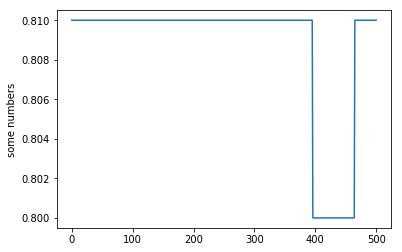

In [67]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel('accuracy')
plt.show()